In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from acquire import acquire_all_heb_sales, erneuerbare_energie

In [ ]:
df = acquire_all_heb_sales()
print(df.shape)
df.head(2)

1. Convert date column to datetime format.

In [ ]:
#reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

In [ ]:
df.head(1)

2. Plot the distribution of sale_amount and item_price.

In [ ]:
df.plot.scatter(y='sale_amount', x='item_price')

In [ ]:
df.sale_amount.plot.hist()

In [ ]:
df.item_price.plot.hist()

3. Set the index to be the datetime variable.

In [ ]:
# sort rows by the date and then set the index as the date
df = df.sort_values('sale_date').set_index('sale_date')

4. Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.

In [ ]:
df['month'] = df.index.month_name()
df['day_of_the_week'] = df.index.day_name()


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [ ]:
df['sales_total'] = df.item_price * df.sale_amount
df.head(1)

6. Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.

In [ ]:
sales_df = df.resample('D')[['sales_total']].sum()
sales_df = sales_df.assign(sales_diff = df.resample('D')[['sales_total']].sum().diff())
sales_df.head()

7. Make all your work reproducible

In [ ]:
def numeric_hists(df, bins=20):
    """
    Function to take in a DataFrame, bins default 20,
    select only numeric dtypes, and
    display histograms for each numeric column
    """
    num_df = df.select_dtypes(include=np.number)
    num_df.hist(bins=bins, color='thistle')
    plt.suptitle('Numeric Column Distributions')
    plt.show()

In [ ]:
def make_new_columns(df):
    """makes new columns of month, day of the week, 
    and total sales which is # of items * unit price"""
    df['month'] = df.index.month_name()
    df['day_of_the_week'] = df.index.day_name()
    df['sales_total'] = df.item_price * df.sale_amount
    return df

In [ ]:
def prep_heb_data(df):
    """Takes in a dataframe and sets date columns as index and as datetime"""
    #reassign the sale_date column to be a datetime type
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
    # sort rows by the date and then set the index as the date
    df = df.sort_values('sale_date').set_index('sale_date')
    
    df = make_new_columns(df)
    df = change_data_types(df)
    numeric_hists(df, bins=20)
    return df

In [ ]:
def change_data_types(df):
    """helper function to run numeric_hist function"""
    df = (df.astype({'sale_id': object, 
                     'store_id': object, 
                     'store_zipcode': object, 
                     'item_id': object, 
                     'item_upc12': object, 
                     'item_upc14': object, 
                     'month': 'category',
                     'day_of_the_week': 'category'}))
    return df

In [ ]:
df = prep_heb_data(df)

# Ze Good German Data

In [ ]:
datarahmen = erneuerbare_energie()
datarahmen.head()

1. Convert date column to datetime format.

In [ ]:
def prep_german_energy(df):
    """function 1. sets date column to date time, sets index to date,
    returns new columns of month and year"""
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df['month'] = df.index.month_name().astype('category')
    df['year'] = df.index.year.astype('category')
    numeric_hists(df)
    return df
df = prep_german_energy(datarahmen)
df.head(2)

2. Plot the distribution of each of your variables.

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(df.Consumption)
axs[0, 1].hist(df.Wind)
axs[1, 0].hist(df.Solar)
axs[1, 1].hist(df['Wind+Solar'])

In [ ]:
sns.lineplot(x='Date', y='Consumption', data=df)

3.Set the index to be the datetime variable.

In [ ]:
# df = df.set_index('Date')

4. Add a month and a year column to your dataframe.

In [ ]:
df['month'] = df.index.month_name()
df['year'] = df.index.year

5. make it reproducible

## Vega-Datasets

    Install Vega data sets

In [ ]:
# pip install vega_datasets

In [ ]:
from vega_datasets import data
df = data.sf_temps()

In [ ]:
df = df.set_index('date')

In [ ]:
df.head(2)

1.  Resample by the day and take the average temperature. Visualize the average temperature over time.

In [ ]:
daily_temp = df.temp.resample("D").mean()
daily_temp.plot()

2. Write the code necessary to visualize the minimum temperature over time.

In [ ]:
df.temp.resample("D").min().plot()

3. Write the code necessary to visualize the maximum temperature over time.

In [ ]:
df.temp.resample("D").max().plot()

4. Which month is the coldest, on average?

In [ ]:
df.temp.resample("M").min().nsmallest(1)

5. Which month has the highest average temperature?

In [ ]:
df.temp.resample("M").max().nlargest(1)

6. 
    - Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
    - Use this resampled dataframe to calculate the change in temperature for the day. 
    - Which month has the highest daily temperature variability?

In [ ]:
daily_temp = pd.DataFrame(df.temp.resample("D").agg(['min', 'max', 'mean']))
daily_temp.head(1)

In [ ]:
daily_temp['temp_diff'] =daily_temp['max'] - daily_temp['min']



In [ ]:
#largest average variability
daily_temp['temp_diff'].resample('M').mean().nlargest(1)

In [ ]:
# highest and lowest daily temperatures 
(daily_temp['max'].resample('M').max() - daily_temp['min'].resample('M').min()).nlargest(1)

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


In [ ]:
daily_temp[['min', 'max', 'mean']].plot()

## Use the Vega_Datasets to work with the flights_20k data

In [29]:
from vega_datasets import data
df = data.flights_20k()

In [30]:
df.tail()

,date,delay,distance,origin,destination
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA
19999,2001-03-14 11:33:00,0,328,ABQ,PHX


1. Convert any negative delays to 0.

In [31]:
df.delay = df.delay.apply(lambda x: 0 if x < 0 else x)

In [32]:
df.delay.describe()

count    20000.000000
mean        11.119450
std         23.527015
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max        509.000000
Name: delay, dtype: float64

2. Which hour of the day has the highest average delay?

In [33]:
df = df.set_index('date').sort_index()


In [36]:
df.shape

(20000, 4)

In [9]:
df['flight_hour'] = df.index.hour
df.groupby('flight_hour').delay.mean().nlargest(1)

flight_hour
3    302.5
Name: delay, dtype: float64

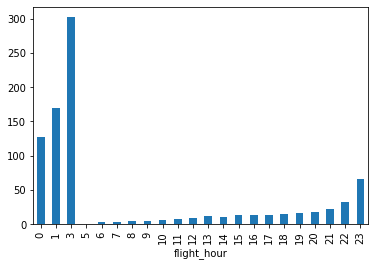

In [10]:
df.groupby('flight_hour').delay.mean().plot.bar()

3.  Does the day of the week make a difference in the delay amount?

In [14]:
df['weekday'] = df.index.day_name()
df.groupby('weekday')

,delay,distance,origin,destination,flight_hour,weekday
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday


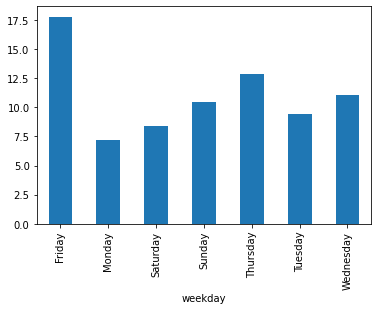

In [15]:
df.groupby('weekday').delay.mean().plot.bar()

Does the month make a difference in the delay amount?

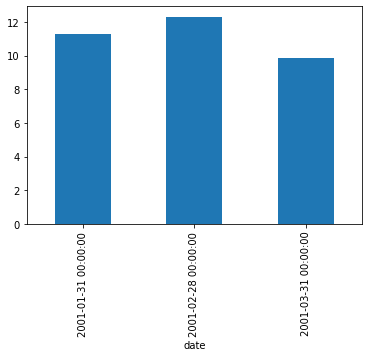

In [37]:
df.resample('M').delay.mean().plot.bar()

(Timestamp('2001-03-31 21:30:00'), Timestamp('2001-01-01 00:01:00'))